### Reading CSV file 

In [105]:
import pandas as pd
file = r"C:\Users\ruchitha\Downloads\emotion_sentimen_dataset.csv"
df = pd.read_csv(file)
df.head(20)

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral
5,5,i feel jealous becasue i wanted that kind of l...,love
6,6,when a friend of mine keeps telling me morbid ...,neutral
7,7,i finally fell asleep feeling angry useless an...,worry
8,8,i feel a bit annoyed and antsy in a good way,neutral
9,9,i feel like i ve regained another vital part o...,neutral


### 1. Remove stop words using regex

#### Importing natural language tool kit

In [104]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'no', 'me', 'the', 'was', 'having', 'can', 'that', 'most', 'were', 'so', 'through', 'him', 'o', 'hadn', 'haven', 'their', "mustn't", 'ain', 'shouldn', 'been', "wasn't", 'further', "hasn't", 'll', 'very', "couldn't", 'few', "haven't", 'ourselves', 'should', 'they', 'and', 'an', "she's", 'theirs', 'y', 'our', 'won', 'mightn', 'only', 'themselves', 'when', 'shan', 'here', 'i', 'now', 'where', 'what', 'are', "hadn't", 'myself', 'why', 'any', 'ours', "that'll", 'does', 'whom', 'wasn', 'your', "you'd", 'being', 'isn', 'into', 'a', "needn't", 'doesn', 'again', 'did', 't', 'more', "you're", 'it', 're', 'has', 'weren', 'herself', 'am', 'up', 'under', 'not', 'down', 'aren', "won't", 'or', 's', 'will', 'out', 'his', 'at', 'after', 'for', 'who', 'ma', 'he', 'on', 'too', 'do', 've', "wouldn't", 'she', 'how', 'against', "should've", 'which', 'during', 'before', 'in', 'all', "didn't", "shouldn't", "weren't", 'himself', "shan't", 'couldn', 'hers', 'doing', 'than', 'then', 'there', 'm', 'its', 'if', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruchitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### remove_stopwords function to each text in the 'text' column of the DataFrame df, removing the stopwords defined in the stopwords list.

In [120]:
def remove_stopwords(text, stopwords):
    pattern = r'\b(?:{})\b'.format('|'.join(stopwords))
    return re.sub(pattern, '', text)

#### Apply remove_stopwords function to the 'text' column

In [121]:
df['text'] = df['text'].apply(lambda x: remove_stopwords(str(x), stopwords))

In [122]:
print(df) #prints the data frame

        Unnamed: 0                                               text  Emotion
0                0  i seriously hate one subject to death  now i f...     hate
1                1                   im  full of life i feel appalled  neutral
2                2  i sit here to write i start to dig out my feel...  neutral
3                3  ive been really angry with   i feel  an idiot ...    anger
4                4  i feel suspicious if there  no one outside   r...  neutral
...            ...                                                ...      ...
839550      839550  i feel  telling these horny devils to find  si...  neutral
839551      839551  i began to realize that when i was feeling agi...  neutral
839552      839552  i feel very curious be why previous early dawn...  neutral
839553      839553  i feel that becuase of  tyranical nature of  g...  neutral
839554      839554  i think that after i had spent some time inves...  neutral

[839555 rows x 3 columns]


### 2. Containing all the statistical operations and form various kinds of plots depicting the data or the business focused on.

#### Columns- displays the names of columns in the dataframe

In [49]:
df.columns

Index(['Unnamed: 0', 'text', 'Emotion'], dtype='object')

#### dtypes- returns the data types of columns in the dataframe

In [50]:
df.dtypes

Unnamed: 0     int64
text          object
Emotion       object
dtype: object

#### info() menthod prints the overview of the DataFrame

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839555 entries, 0 to 839554
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  839555 non-null  int64 
 1   text        839555 non-null  object
 2   Emotion     839555 non-null  object
dtypes: int64(1), object(2)
memory usage: 19.2+ MB


#### describe() method prints statistical data of the DataFrame

In [52]:
df.describe()

,Unnamed: 0
count,839555.000000
mean,419777.000000
std,242358.796961
min,0.000000
25%,209888.500000
50%,419777.000000
75%,629665.500000
max,839554.000000


#### creating a new column 'length' in DataFrame and assigning it the length of each string of the 'text' column

In [53]:
df['length'] = df['text'].str.len()
df.describe() 

,Unnamed: 0,length
count,839555.000000,839555.000000
mean,419777.000000,97.031208
std,242358.796961,56.198160
min,0.000000,2.000000
25%,209888.500000,54.000000
50%,419777.000000,86.000000
75%,629665.500000,128.000000
max,839554.000000,830.000000


#### Gives the overview of data in the dataframe which includes the most common values and their frequencies

In [54]:
df.describe(include='O')

,text,Emotion
count,839555,839555
unique,393822,13
top,i feel more adventurous willing to take risks,neutral
freq,32,674538


#### Below code returns the count of missing values for each column in the dataframe

In [55]:
df.isna().sum()

Unnamed: 0    0
text          0
Emotion       0
length        0
dtype: int64

#### Converting the values in the 'text', 'Emotion' columns of the DataFrame to uppercase using the upper() method

In [56]:
df['Emotion'] = df['Emotion'].str.upper()
df['text'] = df['text'].str.upper()
df.head(10)#displaying first 10 rows of the DataFrame

,Unnamed: 0,text,Emotion,length
0,0,I SERIOUSLY HATE ONE SUBJECT TO DEATH BUT NOW ...,HATE,73
1,1,IM SO FULL OF LIFE I FEEL APPALLED,NEUTRAL,34
2,2,I SIT HERE TO WRITE I START TO DIG OUT MY FEEL...,NEUTRAL,131
3,3,IVE BEEN REALLY ANGRY WITH R AND I FEEL LIKE A...,ANGER,89
4,4,I FEEL SUSPICIOUS IF THERE IS NO ONE OUTSIDE L...,NEUTRAL,87
5,5,I FEEL JEALOUS BECASUE I WANTED THAT KIND OF L...,LOVE,105
6,6,WHEN A FRIEND OF MINE KEEPS TELLING ME MORBID ...,NEUTRAL,77
7,7,I FINALLY FELL ASLEEP FEELING ANGRY USELESS AN...,WORRY,69
8,8,I FEEL A BIT ANNOYED AND ANTSY IN A GOOD WAY,NEUTRAL,44
9,9,I FEEL LIKE I VE REGAINED ANOTHER VITAL PART O...,NEUTRAL,71


#### Filtering DataFrame to find rows where the 'Emotion' column contains the string 'NEUTRAL'

In [58]:
df[df['Emotion'].str.contains('NEUTRAL')]

,Unnamed: 0,text,Emotion,length
1,1,IM SO FULL OF LIFE I FEEL APPALLED,NEUTRAL,34
2,2,I SIT HERE TO WRITE I START TO DIG OUT MY FEEL...,NEUTRAL,131
4,4,I FEEL SUSPICIOUS IF THERE IS NO ONE OUTSIDE L...,NEUTRAL,87
6,6,WHEN A FRIEND OF MINE KEEPS TELLING ME MORBID ...,NEUTRAL,77
8,8,I FEEL A BIT ANNOYED AND ANTSY IN A GOOD WAY,NEUTRAL,44
...,...,...,...,...
839550,839550,I FEEL LIKE TELLING THESE HORNY DEVILS TO FIND...,NEUTRAL,132
839551,839551,I BEGAN TO REALIZE THAT WHEN I WAS FEELING AGI...,NEUTRAL,111
839552,839552,I FEEL VERY CURIOUS BE WHY PREVIOUS EARLY DAWN...,NEUTRAL,90
839553,839553,I FEEL THAT BECUASE OF THE TYRANICAL NATURE OF...,NEUTRAL,222


#### Plotting line plot for the 'length' column

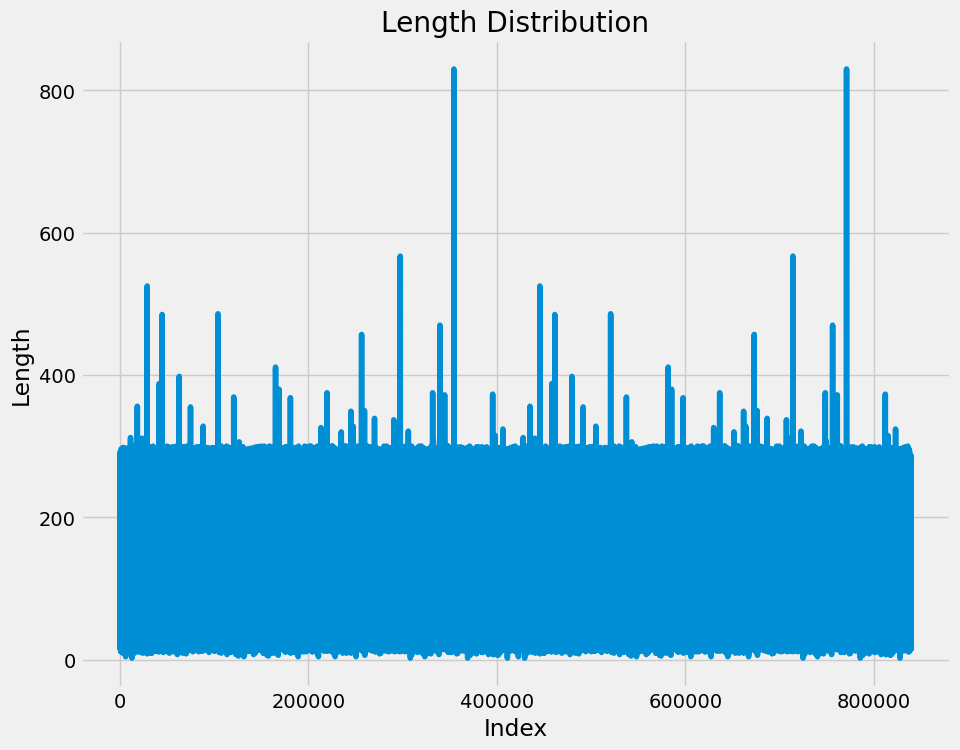

In [59]:
import matplotlib.pyplot as plt
df['length'].plot()
plt.xlabel('Index')
plt.ylabel('Length')
plt.title('Length Distribution')
plt.show()

#### Plotting horizontal box plot of the 'length' column

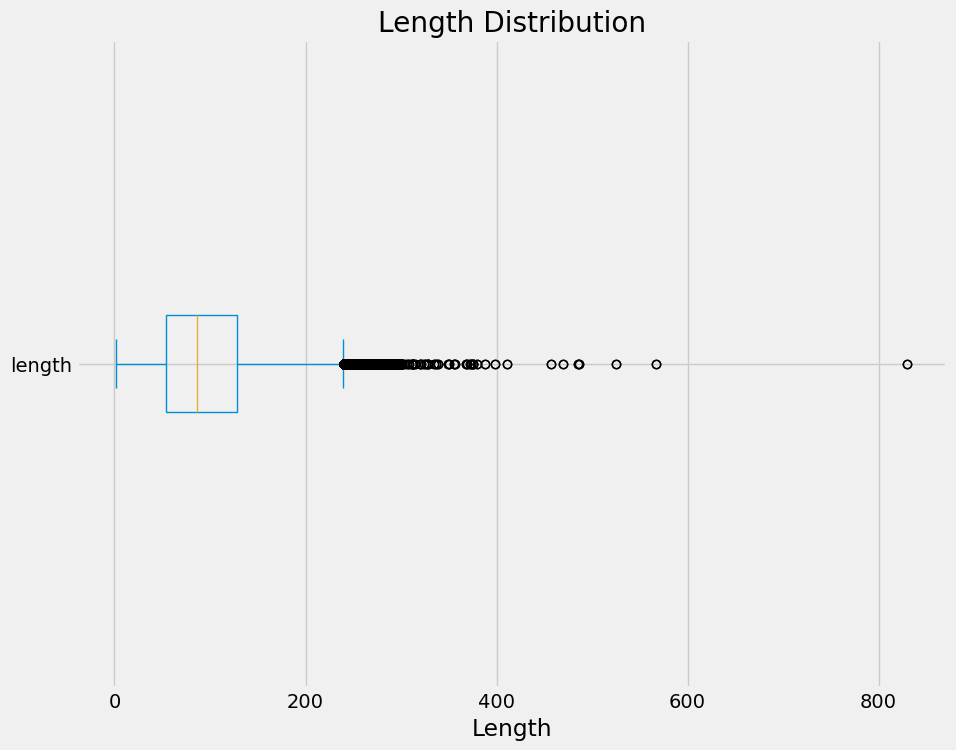

In [60]:
df['length'].plot(kind='box', vert=False)
plt.xlabel('Length')
plt.title('Length Distribution')
plt.show()

#### Plotting histogram of the 'length' column with 30 bins

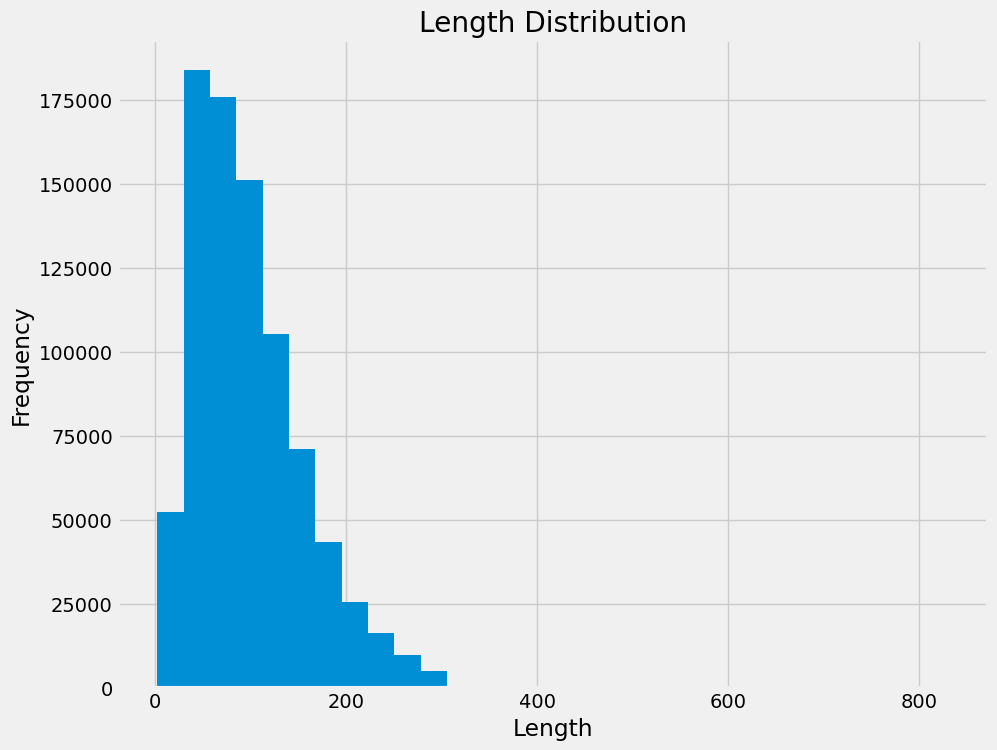

In [61]:
df['length'].plot(kind='hist', bins=30)
plt.xlabel('Length')
plt.title('Length Distribution')
plt.show()

#### Generating a box plot showing the distribution of 'length' for each Emotion ('HATE', 'NEUTRAL', 'ANGER', 'LOVE', 'WORRY')

C:\Users\ruchitha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


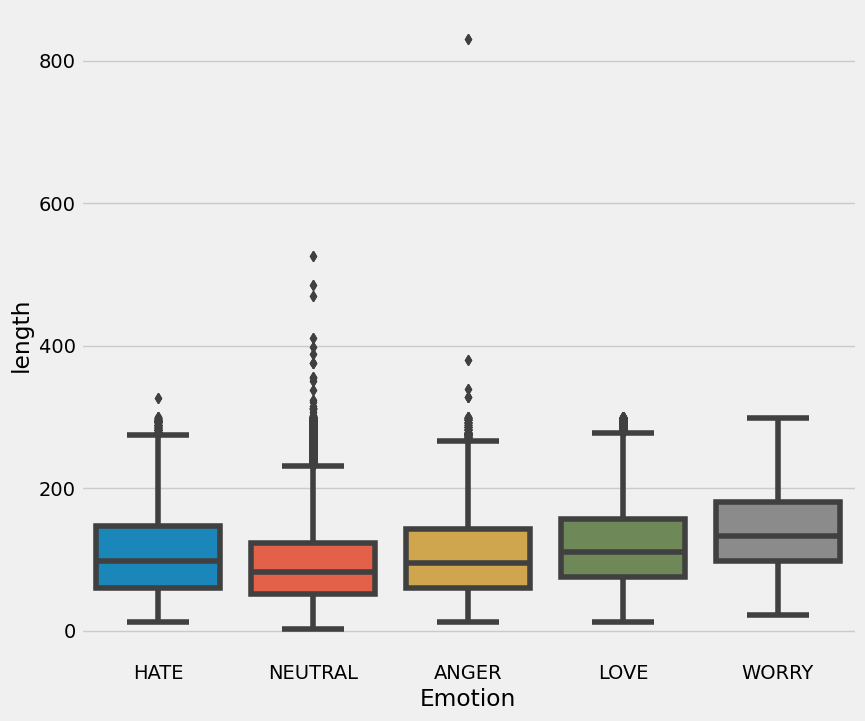

In [62]:
import seaborn as sns 
where = df['Emotion'].isin(['LOVE', 'NEUTRAL', 'HATE', 'WORRY', 'ANGER'])
g = sns.catplot(data=df[where], x="Emotion", y="length", kind='box')
g.fig.set_size_inches(10, 8) 

### 3. Create pipeline, remove stop words, word frequency analysis and word clouds

In [70]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [71]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [72]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [73]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [74]:
df['num_tokens'] = df['tokens'].map(len)
df.tail(10) #prints last 10 rows of the dataframe

,Unnamed: 0,text,Emotion,length,tokens,num_tokens
839545,839545,I FEEL THAT I MUST CONFESS EVEN THOUGH IT KILL...,NEUTRAL,97,"[feel, must, confess, even, though, kills, say...",9
839546,839546,I DON T KNOW WHY TODAY I FEEL LIKE IT LOOKS VE...,NEUTRAL,155,"[know, today, feel, like, looks, cool, know, s...",16
839547,839547,I DON T EVEN FEEL LIKE I FULLY RESOLVED IT BUT...,NEUTRAL,70,"[even, feel, like, fully, resolved, felt, righ...",8
839548,839548,I FEEL LIKE I HAVE BEEN NEGLECTING YOU MY FAIT...,NEUTRAL,59,"[feel, like, neglecting, faithful, reader]",5
839549,839549,I CRY AND FEEL A SENSE OF LOSS WHEN MY PATIENT...,NEUTRAL,241,"[cry, feel, sense, loss, patients, die, helped...",19
839550,839550,I FEEL LIKE TELLING THESE HORNY DEVILS TO FIND...,NEUTRAL,132,"[feel, like, telling, horny, devils, find, sit...",14
839551,839551,I BEGAN TO REALIZE THAT WHEN I WAS FEELING AGI...,NEUTRAL,111,"[began, realize, feeling, agitated, restless, ...",9
839552,839552,I FEEL VERY CURIOUS BE WHY PREVIOUS EARLY DAWN...,NEUTRAL,90,"[feel, curious, previous, early, dawn, time, s...",8
839553,839553,I FEEL THAT BECUASE OF THE TYRANICAL NATURE OF...,NEUTRAL,222,"[feel, becuase, tyranical, nature, government,...",22
839554,839554,I THINK THAT AFTER I HAD SPENT SOME TIME INVES...,NEUTRAL,132,"[think, spent, time, investigating, surroundin...",10


In [75]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('feel', 583925), ('feeling', 270334), ('like', 148936), ('im', 124267), ('really', 52047)]


In [76]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq']) #creating a dataframe freq_df
freq_df = freq_df.query('freq >= 1') #filters out tokens with less than 1 frequency
freq_df.index.name ='token'
freq_df = freq_df.sort_values('freq', ascending=False) #sorts the dataframe in descending order
freq_df.head(10) #displays top 10 rows in the dataframe

,freq
token,
feel,583925
feeling,270334
like,148936
im,124267
really,52047
know,47847
time,42878
get,39434
little,38712


In [77]:
freq_df.describe()

,freq
count,75150.000000
mean,104.528583
std,2585.174237
min,2.000000
25%,2.000000
50%,4.000000
75%,13.000000
max,583925.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

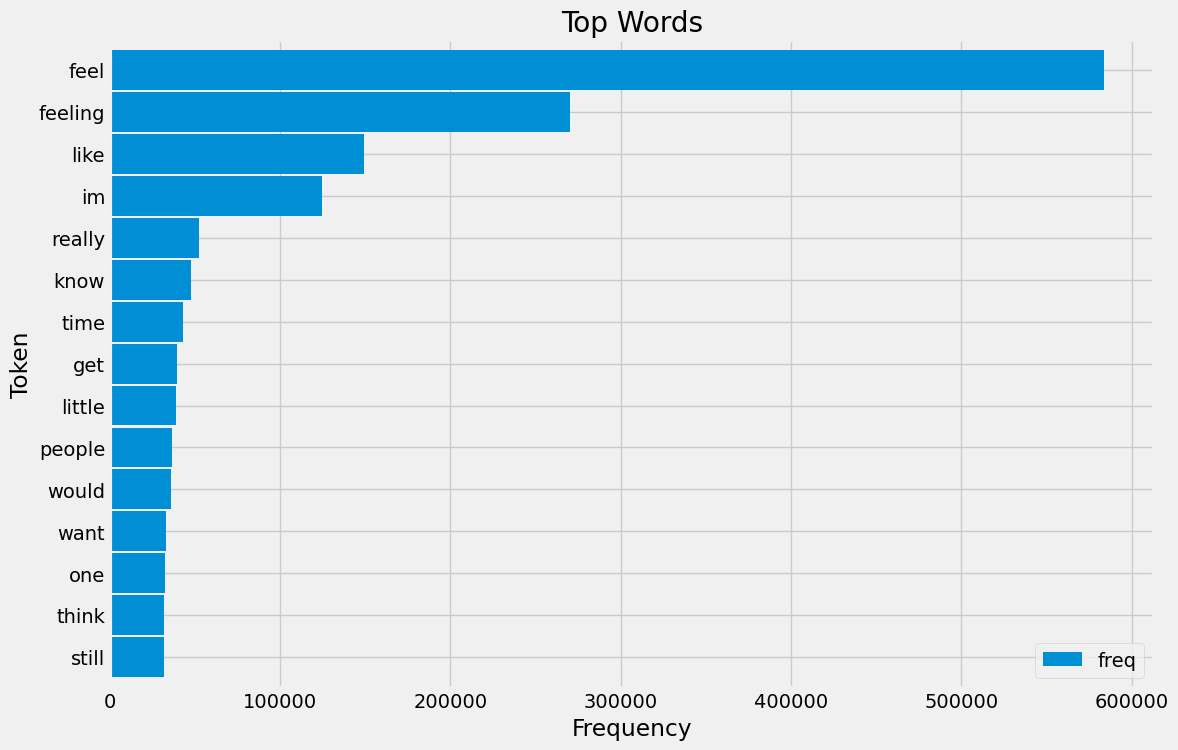

In [78]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [79]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


(-0.5, 399.5, 199.5, -0.5)

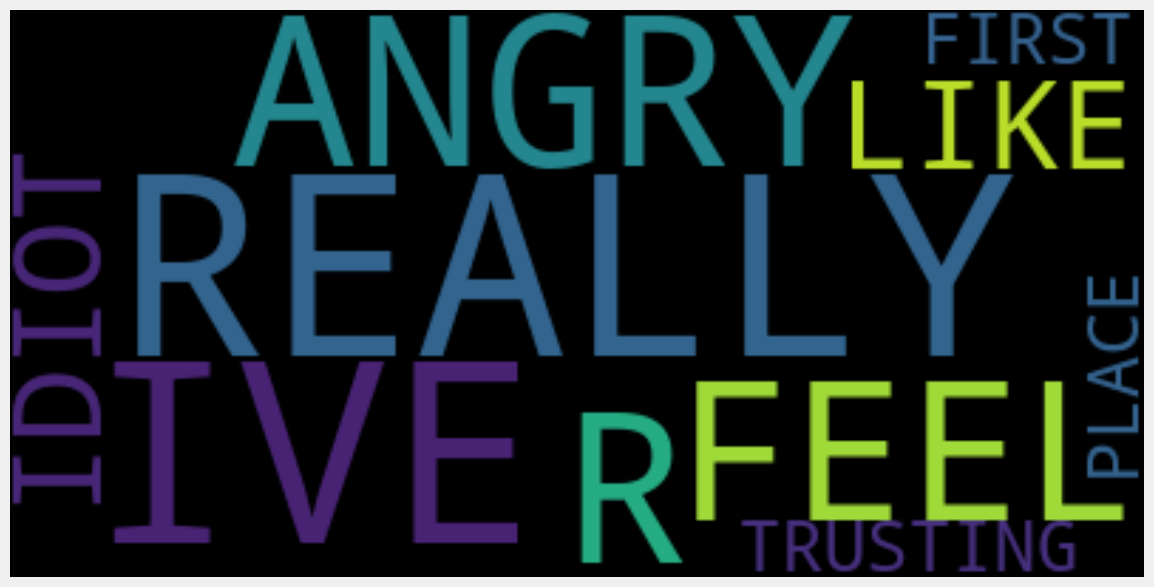

In [81]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = df.query("Emotion=='ANGER'")['text'].values[0]
plt.figure(figsize=(14, 7)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### 4. Pick 5 random strings which we will encounter in our day-to-day life 

In [63]:
import re
text = "Got hurt in a pinch, call Finch 123.455.6789"
pattern = r'\b\d{3}[-.]\d{3}[-.]\d{4}\b'
search = re.findall(pattern, text)
print("numbers found are:")
for search in search:
    print(search)

numbers found are:
123.455.6789


In [64]:
import re
text = 'Who doesnt know Ellie age is around 48 with height 6 feet'
pattern = '\d+'
result = re.findall(pattern, text) 
print(result)

['48', '6']


In [65]:
import re
text="Who doesnt know Ellie age is around 45 with height 6 feet"
pattern = '\d+'
result = re.split(pattern, text) 
print(result)

['Who doesnt know Ellie age is around ', ' with height ', ' feet']


In [66]:
import re
Password = "Qwerty@09438!"
pattern = r'(?=.*[a-zA-Z])(?=.*[0-9])(?=.*[!@#$%^&*])[a-zA-Z0-9!@#$%^&*]{8,}'
result = re.search(pattern, Password)
if result:
    print("Strong Password!")
else:
    print("Invalid Password!")

Strong Password!


In [68]:
import re
text = "Appointment reminder #at #office at #11AM. This is #3rd time to book an appointment"
pattern = r'#\w+'
result = re.findall(pattern, text)
print("Found result:")
for results in result:
    print(results)

Found result:
#at
#office
#11AM
#3rd


### 5. Sentiment analysis

In [1]:
pip install praw

#### Initializing a PRAW Reddit instance with client ID, client secret, and a user agent string

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="bV6KhjbL9qzNUKy0Oke3Hw",
    client_secret="AbBk1XxdlvzjvVEijs7R4OUPCIN78g",
    user_agent=user_agent
)

In [3]:
import pandas as pd
import numpy as np
import re

#### Iterating through the submissions in the "Connecticut" subreddit using PRAW (Python Reddit API Wrapper) and printing various attributes of each submission

In [4]:
headlines = set()
for submission in reddit.subreddit("Connecticut").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Moving to CT? Ask your questions here
1c9e9ly
AutoModerator
1713693677.0
7
0.74
https://www.reddit.com/r/Connecticut/comments/1c9e9ly/moving_to_ct_ask_your_questions_here/
0


#### collects the titles of submissions in the "Connecticut" subreddit without duplicates by adding them to a set named headlines

In [95]:
headlines = set()
for submission in reddit.subreddit("Connecticut").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

971


#### creates a DataFrame from the set of headlines collected

In [96]:
connecticut_df = pd.DataFrame(headlines)
connecticut_df.head()

,0
0,WATERWICK (2024) Trailer - I'm an indie filmma...
1,EARTHQUAKE!!
2,Club for 40+ couple
3,Exclusive Event Dinner with Chef Chrissy & Jam...
4,'Where in Connecticut is ABI?' challenge. Thin...


In [97]:
connecticut_df.columns = ['text']
connecticut_df.columns

Index(['text'], dtype='object')

In [99]:
connecticut_df.columns = ['Titles']
connecticut_df.head()

,Titles
0,WATERWICK (2024) Trailer - I'm an indie filmma...
1,EARTHQUAKE!!
2,Club for 40+ couple
3,Exclusive Event Dinner with Chef Chrissy & Jam...
4,'Where in Connecticut is ABI?' challenge. Thin...


#### Checking duplicates in the Titles column of the dataframe

In [100]:
connecticut_df.Titles.duplicated().sum() 

0

#### created a function cleanTxt() to remove various elements like mentions, hashtags, retweet tags, hyperlinks, and colons from the text

In [101]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
connecticut_df["Titles"]= connecticut_df["Titles"].apply(cleanTxt)

#Show the clean text
connecticut_df.head()

,Titles
0,WATERWICK (2024) Trailer - I'm an indie filmma...
1,EARTHQUAKE!!
2,Club for 40+ couple
3,Exclusive Event Dinner with Chef Chrissy & Jam...
4,'Where in Connecticut is ABI?' challenge. Thin...


#### defined a function remove_emoji() that utilizes a regular expression pattern to match emojis and Unicode characters and replace them with an empty string

In [13]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
connecticut_df["Titles"]= connecticut_df["Titles"].apply(remove_emoji)

#Show the clean text
connecticut_df.head()

,Titles
0,WATERWICK (2024) Trailer - I'm an indie filmma...
1,EARTHQUAKE!!
2,Club for 40+ couple
3,Exclusive Event Dinner with Chef Chrissy & Jam...
4,'Where in Connecticut is ABI?' challenge. Thin...


In [14]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [15]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

#### calculates the subjectivity and polarity of the text in the "text" column of DataFrame connecticut_df using TextBlob and add the results as new columns

In [17]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
connecticut_df['Subjectivity'] = connecticut_df['Titles'].apply(getSubjectivity)
connecticut_df['Polarity'] = connecticut_df['Titles'].apply(getPolarity)

#Now display data
connecticut_df.head()

,Titles,Subjectivity,Polarity
0,WATERWICK (2024) Trailer - I'm an indie filmma...,0.262626,0.128788
1,EARTHQUAKE!!,0.000000,0.000000
2,Club for 40+ couple,0.000000,0.000000
3,Exclusive Event Dinner with Chef Chrissy & Jam...,0.000000,0.000000
4,'Where in Connecticut is ABI?' challenge. Thin...,0.000000,0.000000


#### categorize the polarity scores into different insight categories: "Negative", "Neutral", and "Positive"

In [18]:
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
connecticut_df["Insight"] = connecticut_df["Polarity"].apply(getInsight)

connecticut_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,WATERWICK (2024) Trailer - I'm an indie filmma...,0.262626,0.128788,Positive
1,EARTHQUAKE!!,0.000000,0.000000,Neutral
2,Club for 40+ couple,0.000000,0.000000,Neutral
3,Exclusive Event Dinner with Chef Chrissy & Jam...,0.000000,0.000000,Neutral
4,'Where in Connecticut is ABI?' challenge. Thin...,0.000000,0.000000,Neutral
5,Gample Pavilion Floor - Go Huskies!!!,0.000000,0.000000,Neutral
6,Hello kitty,0.000000,0.000000,Neutral
7,Want to buy a Connecticut Final Four throwback...,1.000000,0.000000,Neutral
8,Please report your earthquake,0.000000,0.000000,Neutral
9,Second burglary at the store,0.000000,0.000000,Neutral


In [19]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#### plotting the count of sentiment categories ("Negative", "Neutral", and "Positive") using a bar plot

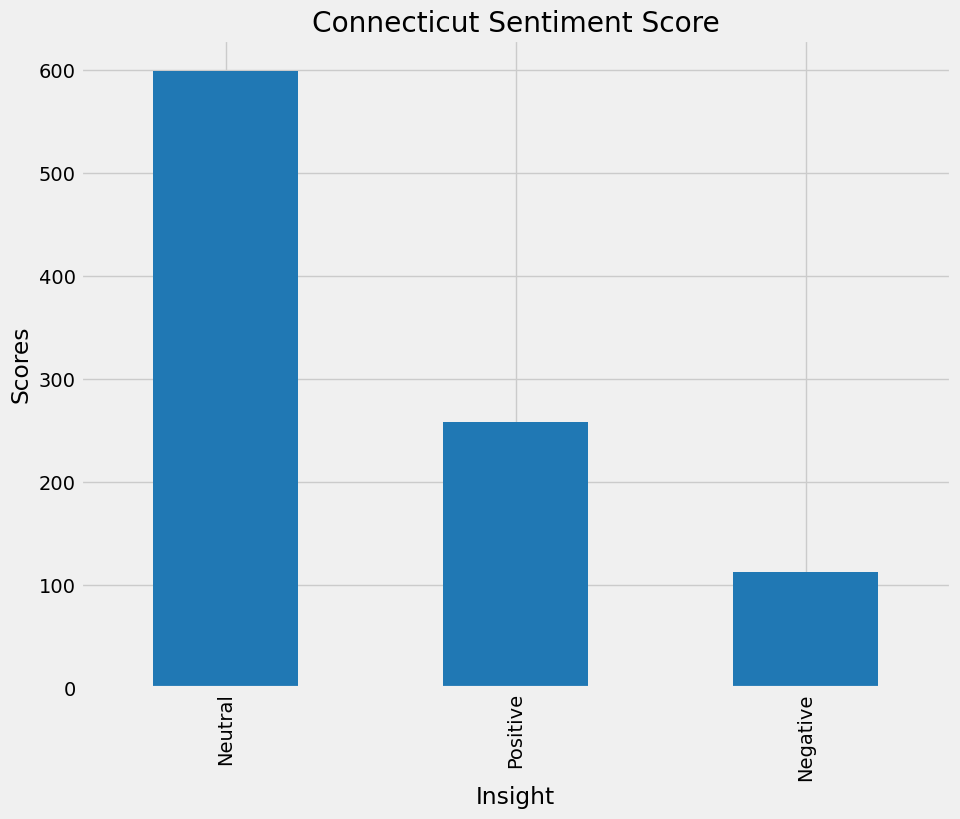

In [21]:
#Plot the values count of sentiment
plt.title("Connecticut Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
connecticut_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()